# Statystyka opisowa w Python

## Analiza rozkładu jednej zmiennej

### Miary tendencji centralnej i miary pozycyjne

- średnia
- mediana
- kwantyle (kwartyle, percentyle)

### Miary rozproszenia 
- odchylenie standardowe
- IQR (rozstęp międzykwartylowy)

### Miary kształtu rozkładu
- skośność
- kurtoza

## Analiza współzależności

### Dwie zmienne numeryczne

- korelacja Pearsona
- korelacja rangowa Spearmana
- tau Kendalla

### Zmienna numeryczna (lub porządkowa) i zmienna dychotomiczna

- d Cohena
- AUC

### Dwie zmienne jakościowe

- V Cramera

### Korelacja między zmienną jakościową a zmienną ilościową

- eta-kwadrat 


### Dane z ankiety:

In [1]:
import pandas as pd
URLCSV = "https://docs.google.com/spreadsheets/d/1Fuj72q5oIxLK74jBfdvI9pNr5Er2rPONfwh3szMq6-Q/export?format=csv"
dane = pd.read_csv(URLCSV)
print(dane.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     161        1.00             17.0            17.5       54.0       Blue   
4     162        0.79             16.0            16.0       57.0       gray   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     2.0   0.5  23:00:00    once a day       200.0   
4  Female         2     0.0   2.0  23:10:00  almost never       192.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

# Średnia arytmetyczna
Liczba rodzeństwa (plus 1) - tzn. odpowiedź na pytanie: "Ile dzieci ma Twoja mama". 
Movies - liczba godzin poświęconych na oglądanie filmów poprzedniego dnia


In [2]:
import numpy as np
print("Średnia liczba dzieci w rodzinie:")
print(np.mean(dane['siblings']))

Średnia liczba dzieci w rodzinie:
2.103896103896104


In [4]:
print("Średnia liczba godzin poświęconych na oglądanie filmów poprzedzającego dnia:")
print(np.mean(dane['movies']))

Średnia liczba godzin poświęconych na oglądanie filmów poprzedzającego dnia:
1.3982666666666668


# Mediana


In [7]:
print("Mediana liczby dzieci w rodzinie:")
print(np.median(dane['siblings']))
print("Mediana zmiennej movies:")
print(np.median(dane['movies']))

Mediana liczby dzieci w rodzinie:
2.0
Mediana zmiennej movies:
nan


In [13]:
print("W zmiennej movies są dwie wartości NaN (braki danych)")
print(np.sum(dane['movies'].isna()))

W zmiennej movies są dwie wartości NaN (braki danych)
2


In [14]:
print("Mediana zmiennej movies:")
print(np.median(dane['movies'].dropna()))

Mediana zmiennej movies:
1.0


Zadanie: wyznaczyć medianę zmiennej obwód głowy u Pań. 

In [21]:
mask = (dane['gender']=="Female")
print("Mediana obwodu głowy u Pań:")
print(np.median(dane['head_circ'][mask].dropna()))
print("Mediana obwodu głowy u Panów:")
print(np.median(dane['head_circ'][~mask].dropna()))

Mediana obwodu głowy u Pań:
55.5
Mediana obwodu głowy u Panów:
58.0


## KwaNtyle

- KwaRtyle (dzielą grupę na 4)
- Decyle (dzielą dane na 10 grup)
- Percentyle (... na 100)

Mediana dzieli zbiorowość posortowaną 50% / 50%
Kwartyl 1 == Percentyl 25: dzieli 25% / 75%
Kwartyl 3 == Percentyl 75: dzieli 75% / 25%


In [32]:
# Kwartyle zmiennej movies:
# Kwartyl 1 
print("Kwartyl pierwszy zmiennej movies:")
print(np.quantile(dane['movies'].dropna(), 0.25))
print("=> W uproszczeniu 25 procent grupy oglądało filmy krócej niż pół godziny")

# Mediana = Kwartyl 2 = Percentyl 50
print("Mediana, czyli kwartyl 2, zmiennej movies:")
print(np.quantile(dane['movies'].dropna(), 0.5))

# Kwartyl 3
print("Kwartyl trzeci zmiennej movies:")
print(np.quantile(dane['movies'].dropna(), 0.75))
print("=> W uproszczeniu 25 procent grupy oglądało filmy dłużej niż dwie godziny")


Kwartyl pierwszy zmiennej movies:
0.5
=> W uproszczeniu 25 procent grupy oglądało filmy krócej niż pół godziny
Mediana, czyli kwartyl 2, zmiennej movies:
1.0
Kwartyl trzeci zmiennej movies:
2.0
=> W uproszczeniu 25 procent grupy oglądało filmy dłużej niż dwie godziny


In [35]:
print("Kwartyle obwodu głowy u Pań:")
# print(np.quantile(dane['head_circ'][mask].dropna(), [0.25, 0.5, 0.75]))
print(np.quantile(dane['head_circ'][dane['gender']=="Female"].dropna(), 
                  [0.25, 0.5, 0.75]))

Kwartyle obwodu głowy u Pań:
[54.  55.5 56.5]


## Odchylenie standardowe

$ s = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2}$

In [39]:
# Odchylenie standardowe zmiennych siblings i movies
print("Odchylenie standardowe zmiennej `siblings`")
print(np.std(dane['siblings'], ddof = 1))
print("Odchylenie standardowe zmiennej `movies`")
print(np.std(dane['movies'], ddof = 1))

Odchylenie standardowe zmiennej `siblings`
0.8205328112432348
Odchylenie standardowe zmiennej `movies`
1.1641182411075257


## IQR (rozstęp międzykwartylowy)

Rozstęp międzykwartylowy to różnica pomiędzy kwartylem trzecim a kwartylem pierwszym. 

$ \text{IQR} = Q_3 - Q_1$

In [42]:
# funkcja iqr jest w pakiecie scipy.stats

from scipy.stats import iqr

print("Rozstęp międzykwartylowy zmiennej movies")
print(iqr(dane['movies'].dropna()))
print("Rozstęp międzykwartylowy zmiennej head_circ.")
print(iqr(dane['head_circ'].dropna()))

Rozstęp międzykwartylowy zmiennej movies
1.5
Rozstęp międzykwartylowy zmiennej head_circ.
2.75


## Miary kształtu rozkładu 

[Skośność](https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_sko%C5%9Bno%C5%9Bci)

Wartość współczynnika skośności bliska 0 => rozkład jest w przybliżeniu symetryczny. 

Większa od zera => prawostronnie skośny (prawy ogon wysunięty).

Mniejsza od zera => lewostronnie skośny (lewy ogon waży więcej). 

In [45]:
from scipy.stats import skew
print("Skośność zmiennej movies - umiarkwoana prawostronna:")
print(skew(dane['movies'].dropna()))

Skośność zmiennej movies:
0.7642083329323968


<function matplotlib.pyplot.show(close=None, block=None)>

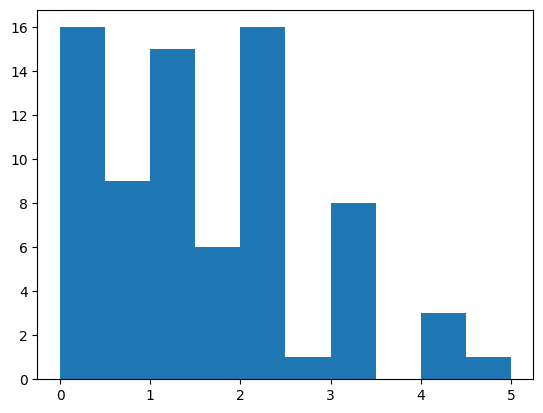

In [46]:
# Histogram zmiennej movies

from matplotlib import pyplot as plt

plt.hist(dane['movies'].dropna())
plt.show

In [47]:
print("Skośność zmiennej head_circ:")
print(skew(dane['head_circ'].dropna()))

Skośność zmiennej head_circ - bliska zeru.
-0.6679231044200055


<function matplotlib.pyplot.show(close=None, block=None)>

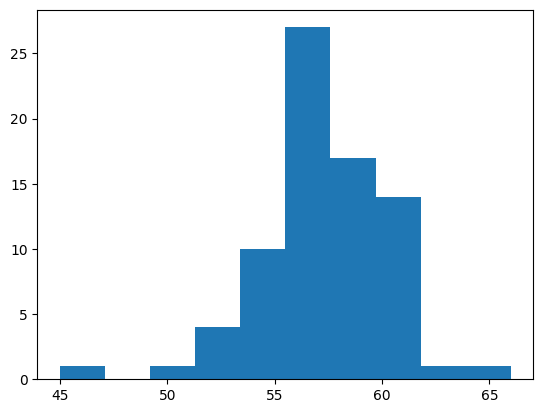

In [49]:
plt.clf()
plt.hist(dane['head_circ'].dropna())
plt.show

## Kurtoza

Kurtoza mierzy ekstremalność wartości odstających / "grubość ogonów". 

In [56]:
from scipy.stats import kurtosis
print("Rozkład wzrostu ma wartości skrajne o podobnym natężeniu i liczbie, co rozkład normalny - kurtoza jest bliska 0")
print(kurtosis(dane['height'].dropna()))

print("W rozkładzie obwodu głowy są dość silne wartości odstające. Kurtoza = 3.3 >> 0 ")
print(kurtosis(dane['head_circ'].dropna()))



Rozkład wzrostu ma wartości skrajne o podobnym natężeniu i liczbie, co rozkład normalny - kurtoza jest bliska 0
-0.27040889080278685
W rozkładzie obwodu głowy są dość silne wartości odstające. Kurtoza = 3.3 >> 0 
3.3287105777396215


In [59]:
# Kod zamieniający wszystko inne niż blue, brown i green na Other
dane.loc[~dane['eye_colour'].isin(['Blue', 'Brown', 'Green']), 'eye_colour'] = 'Other'

In [62]:
pd.crosstab(dane['eye_colour'], dane['gender'])

gender,Female,Male
eye_colour,,
Blue,15,13
Brown,11,16
Green,3,12
Other,4,3


In [69]:
import scipy.stats as stats
m = np.array(pd.crosstab(dane['eye_colour'], dane['gender']))
test_chi = stats.chi2_contingency(m, correction=False)
cramers_v = np.sqrt(test_chi[0] / m.sum() / min(m.shape[0]-1, m.shape[1]-1))
print(cramers_v)

0.2584975583140409


## Eta-kwadrat: korelacja pomiędzy zmienną jakościową (kategorialną) a ilościową. 

In [82]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Example: 'eye_colour' = categorical, 'height' = continuous
model = smf.ols('height ~ C(eye_colour)', data=dane).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta-squared
anova_table['eta_sq'] = anova_table['sum_sq'] / sum(anova_table['sum_sq'])
print(anova_table)

print("\nEta-kwadrat wynosi:")
print(anova_table.loc['C(eye_colour)', 'eta_sq'])

                    sum_sq    df         F    PR(>F)    eta_sq
C(eye_colour)   685.959307   3.0  2.515947  0.064885  0.093706
Residual       6634.352381  73.0       NaN       NaN  0.906294

Eta-kwadrat wynosi:
0.0937062978417409


### Zachęcam do obejrzenia notatek wcześniej grupy, tam:

korelacja Pearsona, 
Spearmana
Tau Kendalla

Korelacja pomiędzy zmienną ilościową a zmienną zero-jedynkową. 

d Cohena
AUC / probability of superiority 